<a href="https://colab.research.google.com/github/omerjan-k/Coursera_Capstone/blob/main/AmsterdamFood_Choice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project - The Battle of Neighborhoods in Amsterdam

**Part 1: Data about the Neighbourhoods in Amsterdam**

***Installing and Importing of Libraries***

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
%pip install geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 102kB 6.7MB/s 
Libraries imported.


**Scraping and Cleaning Amsterdam Neighbourhoods Data**

**use pandas to create a dataframe from the the Wikipedia page.**

In [4]:
df_amsterdam = pd.read_html('https://en.wikipedia.org/wiki/Boroughs_of_Amsterdam')[1]
df_amsterdam

,Borough,Area,Population,Population density,Location (in green),Neighbourhoods
0,Centrum (Centre),8.04 km²,86422,"13,748/km²",NaN,"Binnenstad, Grachtengordel, Haarlemmerbuurt, J..."
1,Noord (North),49.01 km²,94766,"2,269/km²",NaN,"Banne Buiksloot, Buiksloot, Buikslotermeer, Fl..."
2,Nieuw-West(New West),32.38 km²,151677,"4,478/km²",NaN,"Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O..."
3,Oost (East),30.56 km²,135767,"7,635/km²",NaN,"IJburg, Indische Buurt, Eastern Docklands, Oud..."
4,West,9.89 km²,143842,"15,252/km²",NaN,"Frederik Hendrikbuurt, Houthaven, Spaarndammer..."
5,Westpoort(West Gateway),10 km²,192,10/km²,NaN,Westpoort
6,Zuid (South),17.41 km²,144432,"9,349/km²",NaN,"Apollobuurt, Buitenveldert, Hoofddorppleinbuur..."
7,Zuidoost(Southeast),22.08 km²,87854,"4,391/km²",NaN,"Bijlmermeer, Venserpolder, Gaasperdam, Driemond"


**Change the column name**

In [5]:
df_amsterdam_renamed = df_amsterdam.rename(columns={"Location (in green)": "Location"})
df_amsterdam_renamed

,Borough,Area,Population,Population density,Location,Neighbourhoods
0,Centrum (Centre),8.04 km²,86422,"13,748/km²",NaN,"Binnenstad, Grachtengordel, Haarlemmerbuurt, J..."
1,Noord (North),49.01 km²,94766,"2,269/km²",NaN,"Banne Buiksloot, Buiksloot, Buikslotermeer, Fl..."
2,Nieuw-West(New West),32.38 km²,151677,"4,478/km²",NaN,"Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O..."
3,Oost (East),30.56 km²,135767,"7,635/km²",NaN,"IJburg, Indische Buurt, Eastern Docklands, Oud..."
4,West,9.89 km²,143842,"15,252/km²",NaN,"Frederik Hendrikbuurt, Houthaven, Spaarndammer..."
5,Westpoort(West Gateway),10 km²,192,10/km²,NaN,Westpoort
6,Zuid (South),17.41 km²,144432,"9,349/km²",NaN,"Apollobuurt, Buitenveldert, Hoofddorppleinbuur..."
7,Zuidoost(Southeast),22.08 km²,87854,"4,391/km²",NaN,"Bijlmermeer, Venserpolder, Gaasperdam, Driemond"


**Droped columns**

In [6]:
df_amsterdam_renamed.drop(['Location','Area','Population density',], axis=1, inplace = True)
df_amsterdam_renamed

,Borough,Population,Neighbourhoods
0,Centrum (Centre),86422,"Binnenstad, Grachtengordel, Haarlemmerbuurt, J..."
1,Noord (North),94766,"Banne Buiksloot, Buiksloot, Buikslotermeer, Fl..."
2,Nieuw-West(New West),151677,"Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O..."
3,Oost (East),135767,"IJburg, Indische Buurt, Eastern Docklands, Oud..."
4,West,143842,"Frederik Hendrikbuurt, Houthaven, Spaarndammer..."
5,Westpoort(West Gateway),192,Westpoort
6,Zuid (South),144432,"Apollobuurt, Buitenveldert, Hoofddorppleinbuur..."
7,Zuidoost(Southeast),87854,"Bijlmermeer, Venserpolder, Gaasperdam, Driemond"


**Created the grouped Neighborhoods dataframe**

In [7]:
df_Neighborhoods = pd.DataFrame({"Neighbourhoods": df_amsterdam_renamed['Neighbourhoods']})
df_Neighborhoods

,Neighbourhoods
0,"Binnenstad, Grachtengordel, Haarlemmerbuurt, J..."
1,"Banne Buiksloot, Buiksloot, Buikslotermeer, Fl..."
2,"Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, O..."
3,"IJburg, Indische Buurt, Eastern Docklands, Oud..."
4,"Frederik Hendrikbuurt, Houthaven, Spaarndammer..."
5,Westpoort
6,"Apollobuurt, Buitenveldert, Hoofddorppleinbuur..."
7,"Bijlmermeer, Venserpolder, Gaasperdam, Driemond"


**Extract every Neighborhood from the grouped Neighborhoods in order to created individual Neighborhood listed dataframe**

In [8]:
 Neigh=[]
 for key in df_Neighborhoods.Neighbourhoods: 
   Neigh.append(key)   
 print(Neigh)
 len(Neigh)

['Binnenstad, Grachtengordel, Haarlemmerbuurt, Jodenbuurt, Jordaan, Kadijken, Lastage, Oosterdokseiland, Oostelijke Eilanden, Plantage, Rapenburg, Uilenburg, Westelijke Eilanden, Weteringschans', 'Banne Buiksloot, Buiksloot, Buikslotermeer, Floradorp, Kadoelen, Molenwijk, Nieuwendam, Nieuwendammerdijk en Buiksloterdijk, Oostzanerwerf, Overhoeks, Tuindorp Nieuwendam, Tuindorp Oostzaan', 'Geuzenveld, Nieuw Sloten, Oostoever, Osdorp, Overtoomse Veld, Sloten, Slotermeer, Slotervaart', 'IJburg, Indische Buurt, Eastern Docklands, Oud-Oost, Watergraafsmeer', 'Frederik Hendrikbuurt, Houthaven, Spaarndammerbuurt, Staatsliedenbuurt, Zeeheldenbuurt, Westerpark, Kinkerbuurt, Overtoombuurt, De Baarsjes, Bos en Lommer, Kolenkitbuurt, Landlust, Sloterdijk', 'Westpoort', 'Apollobuurt, Buitenveldert, Hoofddorppleinbuurt, Museumkwartier, De Pijp, Prinses Irenebuurt, Rivierenbuurt, Schinkelbuurt, Stadionbuurt, Vondelpark, Willemspark, Zuidas', 'Bijlmermeer, Venserpolder, Gaasperdam, Driemond']


8

In [9]:
def extractDigits(lst): 
    res = [] 
    for el in lst:
        sub = el.split(',') 
        res=res+sub
      
    return(res)
    
    
Neigh_extented = extractDigits(Neigh)   
print(Neigh_extented)
len(Neigh_extented)

['Binnenstad', ' Grachtengordel', ' Haarlemmerbuurt', ' Jodenbuurt', ' Jordaan', ' Kadijken', ' Lastage', ' Oosterdokseiland', ' Oostelijke Eilanden', ' Plantage', ' Rapenburg', ' Uilenburg', ' Westelijke Eilanden', ' Weteringschans', 'Banne Buiksloot', ' Buiksloot', ' Buikslotermeer', ' Floradorp', ' Kadoelen', ' Molenwijk', ' Nieuwendam', ' Nieuwendammerdijk en Buiksloterdijk', ' Oostzanerwerf', ' Overhoeks', ' Tuindorp Nieuwendam', ' Tuindorp Oostzaan', 'Geuzenveld', ' Nieuw Sloten', ' Oostoever', ' Osdorp', ' Overtoomse Veld', ' Sloten', ' Slotermeer', ' Slotervaart', 'IJburg', ' Indische Buurt', ' Eastern Docklands', ' Oud-Oost', ' Watergraafsmeer', 'Frederik Hendrikbuurt', ' Houthaven', ' Spaarndammerbuurt', ' Staatsliedenbuurt', ' Zeeheldenbuurt', ' Westerpark', ' Kinkerbuurt', ' Overtoombuurt', ' De Baarsjes', ' Bos en Lommer', ' Kolenkitbuurt', ' Landlust', ' Sloterdijk', 'Westpoort', 'Apollobuurt', ' Buitenveldert', ' Hoofddorppleinbuurt', ' Museumkwartier', ' De Pijp', ' Pri

69

**Created individual Neighborhood listed dataframe**

In [10]:
df_Neigh_extented = pd.DataFrame(Neigh_extented, columns = ['Neighbourhoods'])
df_Neigh_extented

,Neighbourhoods
0,Binnenstad
1,Grachtengordel
2,Haarlemmerbuurt
3,Jodenbuurt
4,Jordaan
5,Kadijken
6,Lastage
7,Oosterdokseiland
8,Oostelijke Eilanden
9,Plantage


**Obtained Latitude and Longitude for every Neighbourhood by using opencagedata.com**

In [11]:
!pip install opencage
from opencage.geocoder import OpenCageGeocode

     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 2.6MB 14.3MB/s 


In [71]:


geocoder = OpenCageGeocode(key) # get api key from:  https://opencagedata.com

query = 'Amsterdam, NL'  

results = geocoder.geocode(query)

lat = results[0]['geometry']['lat']

lng = results[0]['geometry']['lng']

print (lat, lng)

52.3727598 4.8936041


In [13]:
list_lat = []   # create empty lists

list_long = []


for Neighbourhood in df_Neigh_extented['Neighbourhoods']: # iterate over rows in dataframe



#    City = row['City']
#    State = row['State']       
#    query = str(City)+','+str(State)

    results = geocoder.geocode('{} amsterdam'.format(Neighbourhood))   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)


# create new columns from lists    

df_Neigh_extented['lat'] = list_lat   

df_Neigh_extented['lon'] = list_long

In [14]:
df_Neigh_extented

,Neighbourhoods,lat,lon
0,Binnenstad,52.093622,5.119690
1,Grachtengordel,52.370837,4.885478
2,Haarlemmerbuurt,52.382441,4.887193
3,Jodenbuurt,52.374030,4.889690
4,Jordaan,52.375416,4.881096
5,Kadijken,52.368155,4.918586
6,Lastage,52.375459,4.902402
7,Oosterdokseiland,52.376250,4.907307
8,Oostelijke Eilanden,52.371553,4.921840
9,Plantage,52.365705,4.913661


#Part 2 : Exploration of the location data


**Geographical coordinates of Amsterdam**

In [15]:
address = 'Amsterdam'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam are 52.3727598, 4.8936041.


**Visualization of Amsterdam's neighborhoods**

In [16]:
map_amsterdam = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, Neighbourhood in zip(df_Neigh_extented['lat'], df_Neigh_extented['lon'], df_Neigh_extented['Neighbourhoods']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_amsterdam)  
    
map_amsterdam

#Part 3 : Building clusters of the neighborhoods in Amsterdam City by using Foursquare

In [ ]:

VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)  # your Foursquare ID
print('CLIENT_SECRET:' + CLIENT_SECRET) # your Foursquare Secret

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhoods', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
amsterdam_venues = getNearbyVenues(names=df_Neigh_extented['Neighbourhoods'],
                                   latitudes=df_Neigh_extented['lat'],
                                   longitudes=df_Neigh_extented['lon'])

Binnenstad
 Grachtengordel
 Haarlemmerbuurt
 Jodenbuurt
 Jordaan
 Kadijken
 Lastage
 Oosterdokseiland
 Oostelijke Eilanden
 Plantage
 Rapenburg
 Uilenburg
 Westelijke Eilanden
 Weteringschans
Banne Buiksloot
 Buiksloot
 Buikslotermeer
 Floradorp
 Kadoelen
 Molenwijk
 Nieuwendam
 Nieuwendammerdijk en Buiksloterdijk
 Oostzanerwerf
 Overhoeks
 Tuindorp Nieuwendam
 Tuindorp Oostzaan
Geuzenveld
 Nieuw Sloten
 Oostoever
 Osdorp
 Overtoomse Veld
 Sloten
 Slotermeer
 Slotervaart
IJburg
 Indische Buurt
 Eastern Docklands
 Oud-Oost
 Watergraafsmeer
Frederik Hendrikbuurt
 Houthaven
 Spaarndammerbuurt
 Staatsliedenbuurt
 Zeeheldenbuurt
 Westerpark
 Kinkerbuurt
 Overtoombuurt
 De Baarsjes
 Bos en Lommer
 Kolenkitbuurt
 Landlust
 Sloterdijk
Westpoort
Apollobuurt
 Buitenveldert
 Hoofddorppleinbuurt
 Museumkwartier
 De Pijp
 Prinses Irenebuurt
 Rivierenbuurt
 Schinkelbuurt
 Stadionbuurt
 Vondelpark
 Willemspark
 Zuidas
Bijlmermeer
 Venserpolder
 Gaasperdam
 Driemond


In [20]:
print(amsterdam_venues.shape)
amsterdam_venues.head()

(2562, 7)


,Neighbourhoods,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Binnenstad,52.093622,5.11969,The Village Coffee & Music,52.094956,5.120178,Coffee Shop
1,Binnenstad,52.093622,5.11969,Bigoli,52.092683,5.119249,Sandwich Place
2,Binnenstad,52.093622,5.11969,Meneer Smakers,52.092572,5.117228,Burger Joint
3,Binnenstad,52.093622,5.11969,Bloemenmarkt,52.093551,5.122593,Flower Shop
4,Binnenstad,52.093622,5.11969,Café de Zaak,52.092097,5.120118,Bar


In [21]:
amsterdam_venues.groupby('Neighbourhoods').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhoods,,,,,,
Bos en Lommer,49,49,49,49,49,49
Buiksloot,10,10,10,10,10,10
Buikslotermeer,21,21,21,21,21,21
Buitenveldert,48,48,48,48,48,48
De Baarsjes,57,57,57,57,57,57
De Pijp,100,100,100,100,100,100
Driemond,4,4,4,4,4,4
Eastern Docklands,38,38,38,38,38,38
Floradorp,19,19,19,19,19,19


In [22]:
print('There are {} uniques categories.'.format(len(amsterdam_venues['Venue Category'].unique())))


There are 282 uniques categories.


In [25]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
amsterdam_Venues_only_restaurant = amsterdam_venues[amsterdam_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
amsterdam_Venues_only_restaurant.index = np.arange(1, len(amsterdam_Venues_only_restaurant )+1)

In [26]:
# create a dataframe of top 10 categories
amsterdam_Venues_Top10 = amsterdam_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
amsterdam_Venues_Top10=amsterdam_Venues_Top10.reset_index()
amsterdam_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
amsterdam_Venues_Top10

,Venue_Category,Frequency
0,Restaurant,109
1,Italian Restaurant,80
2,French Restaurant,37
3,Turkish Restaurant,24
4,Vegetarian / Vegan Restaurant,23
5,Indonesian Restaurant,22
6,Thai Restaurant,17
7,Fast Food Restaurant,16
8,Japanese Restaurant,15
9,Tapas Restaurant,14


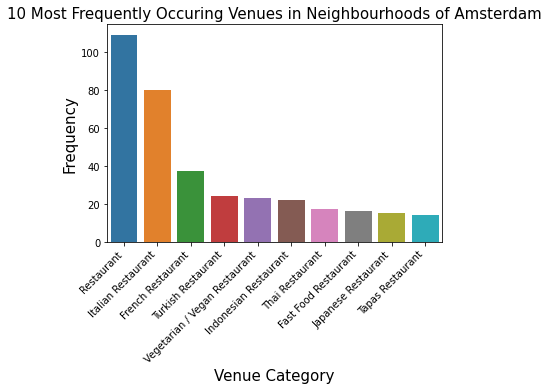

<Figure size 1296x504 with 0 Axes>

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=amsterdam_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in Neighbourhoods of Amsterdam', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

**Let's check the size of the resulting dataframe**

In [28]:
amsterdam_Restaurant = amsterdam_Venues_only_restaurant
amsterdam_Restaurant.head()

,Neighbourhoods,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Binnenstad,52.093622,5.11969,Ana's Kuzin,52.095063,5.120914,Turkish Restaurant
2,Binnenstad,52.093622,5.11969,Ān Ān,52.094382,5.119486,Vietnamese Restaurant
3,Binnenstad,52.093622,5.11969,Restaurant San Siro,52.091578,5.120383,Italian Restaurant
4,Binnenstad,52.093622,5.11969,Beers & Barrels,52.091938,5.116894,American Restaurant
5,Binnenstad,52.093622,5.11969,Toko Mitra,52.093293,5.116383,Indonesian Restaurant


In [29]:
amsterdam_Restaurant.shape

(545, 7)

**Analyze Each Neighborhood**

In [30]:
# one hot encoding
amsterdam_onehot = pd.get_dummies(amsterdam_Restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
amsterdam_onehot['Neighbourhoods'] = amsterdam_Restaurant['Neighbourhoods'] 

# move neighborhood column to the first column
fixed_columns = [amsterdam_onehot.columns[-1]] + list(amsterdam_onehot.columns[:-1])
amsterdam_onehot = amsterdam_onehot[fixed_columns]

amsterdam_onehot.head()
amsterdam_onehot.shape

(545, 56)

In [31]:
amsterdam_onehot_grouped=amsterdam_onehot.groupby(["Neighbourhoods"]).sum().reset_index()
print(amsterdam_onehot_grouped.shape)
amsterdam_onehot_grouped.head()

(60, 56)


,Neighbourhoods,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,French Restaurant,Greek Restaurant,Halal Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Bos en Lommer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,2,2,0
1,Buikslotermeer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Buitenveldert,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,1,1,0,0,2,0,0,0,0,0,1
3,De Baarsjes,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,De Pijp,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2,1,0,0,1,2,0,6,2,0,0,0,1,0,2,0,1,0,0,0,2,3,0,0,1,3,0,0,0,1,0,0,1,2,1


**Next, let's group rows by neighborhoods and by taking the mean of the frequency of occurrence of each category**

In [32]:
amsterdam_grouped = amsterdam_onehot.groupby('Neighbourhoods').mean().reset_index()
amsterdam_grouped.head()

,Neighbourhoods,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Belgian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,French Restaurant,Greek Restaurant,Halal Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Persian Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Bos en Lommer,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.153846,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.076923,0.0,0.000000,0.000000,0.076923,0.0,0.000000,0.076923,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.153846,0.0,0.0,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.076923,0.0,0.153846,0.153846,0.000000
1,Buikslotermeer,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.333333,0.0,0.0,0.333333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Buitenveldert,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.083333,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.083333,0.000000,0.0,0.000000,0.000000,0.0,0.083333,0.0,0.000000,0.083333,0.0,0.0,0.000000,0.166667,0.0,0.0,0.083333,0.083333,0.0,0.0,0.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.083333
3,De Baarsjes,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,0.090909,0.0,0.000000,0.000000,0.0,0.0,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.090909,0.090909,0.0,0.090909,0.0,0.000000,0.000000,0.0,0.0,0.090909,0.272727,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,De Pijp,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.028571,0.028571,0.028571,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.057143,0.028571,0.0,0.0,0.028571,0.057143,0.0,0.171429,0.057143,0.000000,0.0,0.000000,0.028571,0.0,0.057143,0.0,0.028571,0.000000,0.0,0.0,0.057143,0.085714,0.0,0.0,0.028571,0.085714,0.0,0.0,0.000000,0.028571,0.000000,0.0,0.028571,0.057143,0.028571


In [33]:
amsterdam_grouped.shape

(60, 56)

**Let's print each neighborhood along with the top 5 most common venues**

In [34]:
num_top_venues = 5

for hood in amsterdam_grouped['Neighbourhoods']:
    print("----"+hood+"----")
    temp = amsterdam_grouped[amsterdam_grouped['Neighbourhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Bos en Lommer----
                           venue  freq
0                     Restaurant  0.15
1  Vegetarian / Vegan Restaurant  0.15
2             Turkish Restaurant  0.15
3           Fast Food Restaurant  0.15
4                Thai Restaurant  0.08


---- Buikslotermeer----
                 venue  freq
0   Seafood Restaurant  0.33
1  Japanese Restaurant  0.33
2           Restaurant  0.33
3    Afghan Restaurant  0.00
4     Ramen Restaurant  0.00


---- Buitenveldert----
                       venue  freq
0           Sushi Restaurant  0.17
1                 Restaurant  0.17
2      Vietnamese Restaurant  0.08
3  Middle Eastern Restaurant  0.08
4         Persian Restaurant  0.08


---- De Baarsjes----
                       venue  freq
0                 Restaurant  0.27
1        Lebanese Restaurant  0.09
2   Mediterranean Restaurant  0.09
3  Middle Eastern Restaurant  0.09
4          Indian Restaurant  0.09


---- De Pijp----
                           venue  freq
0             Ita

**Let's put that into a pandas dataframe**

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Now let's create the new dataframe and display the top 10 venues for each neighborhood**

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighbourhood_venues_sorted = pd.DataFrame(columns=columns)
Neighbourhood_venues_sorted['Neighbourhoods'] = amsterdam_grouped['Neighbourhoods']

for ind in np.arange(amsterdam_grouped.shape[0]):
    Neighbourhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(amsterdam_grouped.iloc[ind, :], num_top_venues)

Neighbourhood_venues_sorted.head()

,Neighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bos en Lommer,Turkish Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Fast Food Restaurant,Korean Restaurant,Mediterranean Restaurant,Indonesian Restaurant,Thai Restaurant,Seafood Restaurant,Empanada Restaurant
1,Buikslotermeer,Japanese Restaurant,Seafood Restaurant,Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant
2,Buitenveldert,Restaurant,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Fast Food Restaurant,South American Restaurant,Asian Restaurant,Persian Restaurant
3,De Baarsjes,Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Indian Restaurant,Ramen Restaurant,Fast Food Restaurant,Lebanese Restaurant,Chinese Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,De Pijp,Italian Restaurant,South American Restaurant,Restaurant,French Restaurant,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Ramen Restaurant,Middle Eastern Restaurant,Moroccan Restaurant


**I tried two different elbow methods in order to find the optimal K**

In [37]:
amsterdam_grouped_clustering = amsterdam_grouped.drop('Neighbourhoods', 1)

In [38]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(amsterdam_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

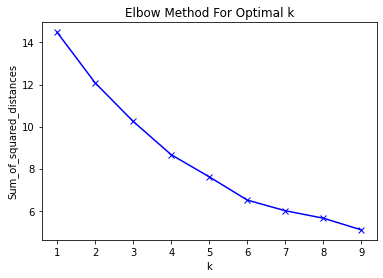

In [39]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

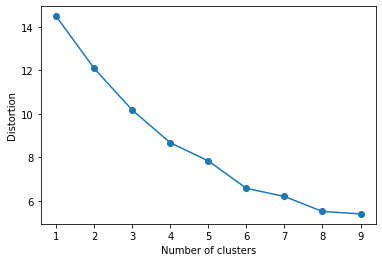

In [68]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(amsterdam_grouped_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [57]:
kclusters = 6



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(amsterdam_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 5, 0, 0, 0, 4,
       2, 0, 3, 0, 1, 5, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 5, 0, 1, 3, 0,
       2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 5, 0, 3, 5, 3], dtype=int32)

In [58]:
amsterdam_grouped_clustering.shape[0]

60

In [59]:
# add clustering labels
Neighbourhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


amsterdam_merged = amsterdam_Venues_only_restaurant

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
amsterdam_merged = amsterdam_merged.join(Neighbourhood_venues_sorted.set_index('Neighbourhoods'), on='Neighbourhoods')




amsterdam_merged # check the last columns!

,Neighbourhoods,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Binnenstad,52.093622,5.119690,Ana's Kuzin,52.095063,5.120914,Turkish Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
2,Binnenstad,52.093622,5.119690,Ān Ān,52.094382,5.119486,Vietnamese Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
3,Binnenstad,52.093622,5.119690,Restaurant San Siro,52.091578,5.120383,Italian Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
4,Binnenstad,52.093622,5.119690,Beers & Barrels,52.091938,5.116894,American Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
5,Binnenstad,52.093622,5.119690,Toko Mitra,52.093293,5.116383,Indonesian Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
6,Binnenstad,52.093622,5.119690,De Zakkendrager,52.092604,5.115716,Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
7,Binnenstad,52.093622,5.119690,Café - Restaurant Graaf Floris,52.090975,5.120425,Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
8,Binnenstad,52.093622,5.119690,Sirtaki,52.090483,5.120901,Greek Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
9,Binnenstad,52.093622,5.119690,Kimmade,52.090599,5.117207,Vietnamese Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
10,Binnenstad,52.093622,5.119690,Kookmeesters,52.092331,5.124252,Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant


**Finally, let's visualize the resulting clusters**

In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(amsterdam_merged['Neighbourhood Latitude'], amsterdam_merged['Neighbourhood Longitude'], amsterdam_merged['Neighbourhoods'], amsterdam_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#Part 4 : Examine the Clusters

**Cluster 1**

In [61]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 0, amsterdam_merged.columns[[0] + list(range(6, amsterdam_merged.shape[1]))]]

,Neighbourhoods,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Binnenstad,Turkish Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
2,Binnenstad,Vietnamese Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
3,Binnenstad,Italian Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
4,Binnenstad,American Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
5,Binnenstad,Indonesian Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
6,Binnenstad,Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
7,Binnenstad,Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
8,Binnenstad,Greek Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
9,Binnenstad,Vietnamese Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant
10,Binnenstad,Restaurant,0,Restaurant,Italian Restaurant,French Restaurant,Seafood Restaurant,Greek Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Turkish Restaurant,American Restaurant


**Cluster 2**

In [62]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 1, amsterdam_merged.columns[[0] + list(range(6, amsterdam_merged.shape[1]))]]

,Neighbourhoods,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
81,Kadijken,Italian Restaurant,1,Restaurant,Italian Restaurant,Middle Eastern Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
82,Kadijken,Restaurant,1,Restaurant,Italian Restaurant,Middle Eastern Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
83,Kadijken,Middle Eastern Restaurant,1,Restaurant,Italian Restaurant,Middle Eastern Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
84,Kadijken,Restaurant,1,Restaurant,Italian Restaurant,Middle Eastern Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
171,Kadoelen,Restaurant,1,Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
179,Overhoeks,Restaurant,1,Restaurant,Italian Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
180,Overhoeks,Italian Restaurant,1,Restaurant,Italian Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
181,Overhoeks,Restaurant,1,Restaurant,Italian Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
182,Overhoeks,Restaurant,1,Restaurant,Italian Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
183,Overhoeks,Restaurant,1,Restaurant,Italian Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant


**Cluster 3**

In [63]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 2, amsterdam_merged.columns[[0] + list(range(6, amsterdam_merged.shape[1]))]]

,Neighbourhoods,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
172,Nieuwendam,Indonesian Restaurant,2,Indonesian Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant,Falafel Restaurant
187,Tuindorp Nieuwendam,Indonesian Restaurant,2,Indonesian Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant,Falafel Restaurant


**Cluster 4**

In [64]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 3, amsterdam_merged.columns[[0] + list(range(6, amsterdam_merged.shape[1]))]]

,Neighbourhoods,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
115,Oostelijke Eilanden,Mediterranean Restaurant,3,Italian Restaurant,Mediterranean Restaurant,Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
116,Oostelijke Eilanden,Italian Restaurant,3,Italian Restaurant,Mediterranean Restaurant,Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
117,Oostelijke Eilanden,Restaurant,3,Italian Restaurant,Mediterranean Restaurant,Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
211,IJburg,Asian Restaurant,3,Italian Restaurant,Asian Restaurant,Greek Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
212,IJburg,Italian Restaurant,3,Italian Restaurant,Asian Restaurant,Greek Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
213,IJburg,Italian Restaurant,3,Italian Restaurant,Asian Restaurant,Greek Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
214,IJburg,Greek Restaurant,3,Italian Restaurant,Asian Restaurant,Greek Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
248,Frederik Hendrikbuurt,Caribbean Restaurant,3,Italian Restaurant,Mediterranean Restaurant,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Afghan Restaurant,Thai Restaurant,Tapas Restaurant,Doner Restaurant,Greek Restaurant,French Restaurant
249,Frederik Hendrikbuurt,Italian Restaurant,3,Italian Restaurant,Mediterranean Restaurant,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Afghan Restaurant,Thai Restaurant,Tapas Restaurant,Doner Restaurant,Greek Restaurant,French Restaurant
250,Frederik Hendrikbuurt,Mediterranean Restaurant,3,Italian Restaurant,Mediterranean Restaurant,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Afghan Restaurant,Thai Restaurant,Tapas Restaurant,Doner Restaurant,Greek Restaurant,French Restaurant


**Cluster 5**

In [65]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 4, amsterdam_merged.columns[[0] + list(range(6, amsterdam_merged.shape[1]))]]

,Neighbourhoods,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
190,Nieuw Sloten,Chinese Restaurant,4,Chinese Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
234,Eastern Docklands,Spanish Restaurant,4,Chinese Restaurant,Spanish Restaurant,Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant
235,Eastern Docklands,Restaurant,4,Chinese Restaurant,Spanish Restaurant,Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant
236,Eastern Docklands,Chinese Restaurant,4,Chinese Restaurant,Spanish Restaurant,Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant
237,Eastern Docklands,Chinese Restaurant,4,Chinese Restaurant,Spanish Restaurant,Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant


**Cluater 6**

In [66]:
amsterdam_merged.loc[amsterdam_merged['Cluster Labels'] == 5, amsterdam_merged.columns[[0] + list(range(6, amsterdam_merged.shape[1]))]]

,Neighbourhoods,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
164,Banne Buiksloot,Turkish Restaurant,5,Turkish Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
165,Banne Buiksloot,Restaurant,5,Turkish Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
169,Floradorp,Turkish Restaurant,5,Turkish Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
170,Floradorp,Turkish Restaurant,5,Turkish Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
188,Geuzenveld,Turkish Restaurant,5,Italian Restaurant,Turkish Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
189,Geuzenveld,Italian Restaurant,5,Italian Restaurant,Turkish Restaurant,Dutch Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Fondue Restaurant,Fast Food Restaurant
193,Osdorp,Turkish Restaurant,5,Turkish Restaurant,Sushi Restaurant,Fast Food Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
194,Osdorp,Sushi Restaurant,5,Turkish Restaurant,Sushi Restaurant,Fast Food Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
195,Osdorp,Turkish Restaurant,5,Turkish Restaurant,Sushi Restaurant,Fast Food Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
196,Osdorp,Indonesian Restaurant,5,Turkish Restaurant,Sushi Restaurant,Fast Food Restaurant,Indonesian Restaurant,Vietnamese Restaurant,Dutch Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
